# Face Recognition Menggunakan Convolution Neural Network (CNN)

## Import Library

In [1]:
import os
import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Activation, Input

from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten

## Pra-Processing

### Pembuatan Fungsi untuk Pre-Processing dan Pengecekan Gambar

##### Convert Gambar ke Grayscale & Resize Gambar (100*100)


In [3]:
def detect_face(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (50, 50))
    return img

In [4]:
def print_progress(val, val_len, folder, bar_size=20):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (progr, val+1, folder), end="\r")

##### Pengecekan Dataset
Pada tahap ini dataset sudah di bagi secara manual dengan pembagian data yaitu 85% train, 10% Validasi, 5% Uji

In [5]:
dataset_folder = "Dataset/dataset_train_cropped/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    files = os.listdir(os.path.join(dataset_folder, folder))[:1000]
    if len(files) < 10 :
        continue
    for i, name in enumerate(files): 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img = detect_face(img) # detect face using mtcnn and crop to 100x100
            if img is not None :
                images.append(img)
                names.append(folder)

                print_progress(i, len(files), folder)


[####################] (750 samples)	 label : Aldi_210170172 		
[####################] (750 samples)	 label : Anisa_220170186 		
[####################] (750 samples)	 label : Aqiilah_210170162 		
[####################] (750 samples)	 label : Ari_210170114 		
[####################] (750 samples)	 label : Atrida_210170028 		
[####################] (750 samples)	 label : Caca_210170054 		
[####################] (750 samples)	 label : Citra_210170063 		
[####################] (750 samples)	 label : Dian_220170068 		
[####################] (750 samples)	 label : Dika_210170126 		
[####################] (750 samples)	 label : Dilla_210170032 		
[####################] (750 samples)	 label : Dini_210170167 		
[####################] (750 samples)	 label : Eriska_210170169 		
[####################] (750 samples)	 label : Indri_210170058 		
[####################] (750 samples)	 label : Irvina_210170182 		
[####################] (750 samples)	 label : Lala_210170123 		
[####################] (750

In [7]:
print("Total dataset train:", len(names))

Total dataset train: 27000


In [8]:
dataset_folder = "Dataset/dataset_validasi_cropped/"

names_val = []
images_val = []
for folder in os.listdir(dataset_folder):
    files = os.listdir(os.path.join(dataset_folder, folder))[:150]
    if len(files) < 10 :
        continue
    for i, name in enumerate(files): 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img = detect_face(img) # detect face using mtcnn and crop to 100x100
            if img is not None :
                images_val.append(img)
                names_val.append(folder)

                print_progress(i, len(files), folder)


[####################] (85 samples)	 label : Aldi_210170172 		
[####################] (85 samples)	 label : Anisa_220170186 		
[####################] (85 samples)	 label : Aqiilah_210170162 		
[####################] (85 samples)	 label : Ari_210170114 		
[####################] (85 samples)	 label : Atrida_210170028 		
[####################] (85 samples)	 label : Caca_210170054 		
[####################] (85 samples)	 label : Citra_210170063 		
[####################] (85 samples)	 label : Dian_220170068 		
[####################] (85 samples)	 label : Dika_210170126 		
[####################] (85 samples)	 label : Dilla_210170032 		
[####################] (85 samples)	 label : Dini_210170167 		
[####################] (85 samples)	 label : Eriska_210170169 		
[####################] (85 samples)	 label : Indri_210170058 		
[####################] (85 samples)	 label : Irvina_210170182 		
[####################] (85 samples)	 label : Lala_210170123 		
[####################] (85 samples)	 label

In [9]:
print("Total dataset validasi:", len(names_val))

Total dataset validasi: 3060


In [10]:
dataset_folder = "dataset/dataset_uji_cropped/"

names_uji = []
images_uji = []
for folder in os.listdir(dataset_folder):
    files = os.listdir(os.path.join(dataset_folder, folder))[:150]
    if len(files) < 5 :
        continue
    for i, name in enumerate(files): 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img = detect_face(img) # detect face using mtcnn and crop to 100x100
            if img is not None :
                images_uji.append(img)
                names_uji.append(folder)

                print_progress(i, len(files), folder)


[####################] (45 samples)	 label : Aldi_210170172 		
[####################] (45 samples)	 label : Anisa_220170186 		
[####################] (45 samples)	 label : Aqiilah_210170162 		
[####################] (45 samples)	 label : Ari_210170114 		
[####################] (45 samples)	 label : Atrida_210170028 		
[####################] (45 samples)	 label : Caca_210170054 		
[####################] (45 samples)	 label : Citra_210170063 		
[####################] (45 samples)	 label : Dian_220170068 		
[####################] (45 samples)	 label : Dika_210170126 		
[####################] (45 samples)	 label : Dilla_210170032 		
[####################] (45 samples)	 label : Dini_210170167 		
[####################] (45 samples)	 label : Eriska_210170169 		
[####################] (45 samples)	 label : Indri_210170058 		
[####################] (45 samples)	 label : Irvina_210170182 		
[####################] (45 samples)	 label : Lala_210170123 		
[####################] (45 samples)	 label

In [11]:
print("Total dataset uji:", len(names_uji))

Total dataset uji: 1620


Menampilkan Gambar pada salah satu dataset

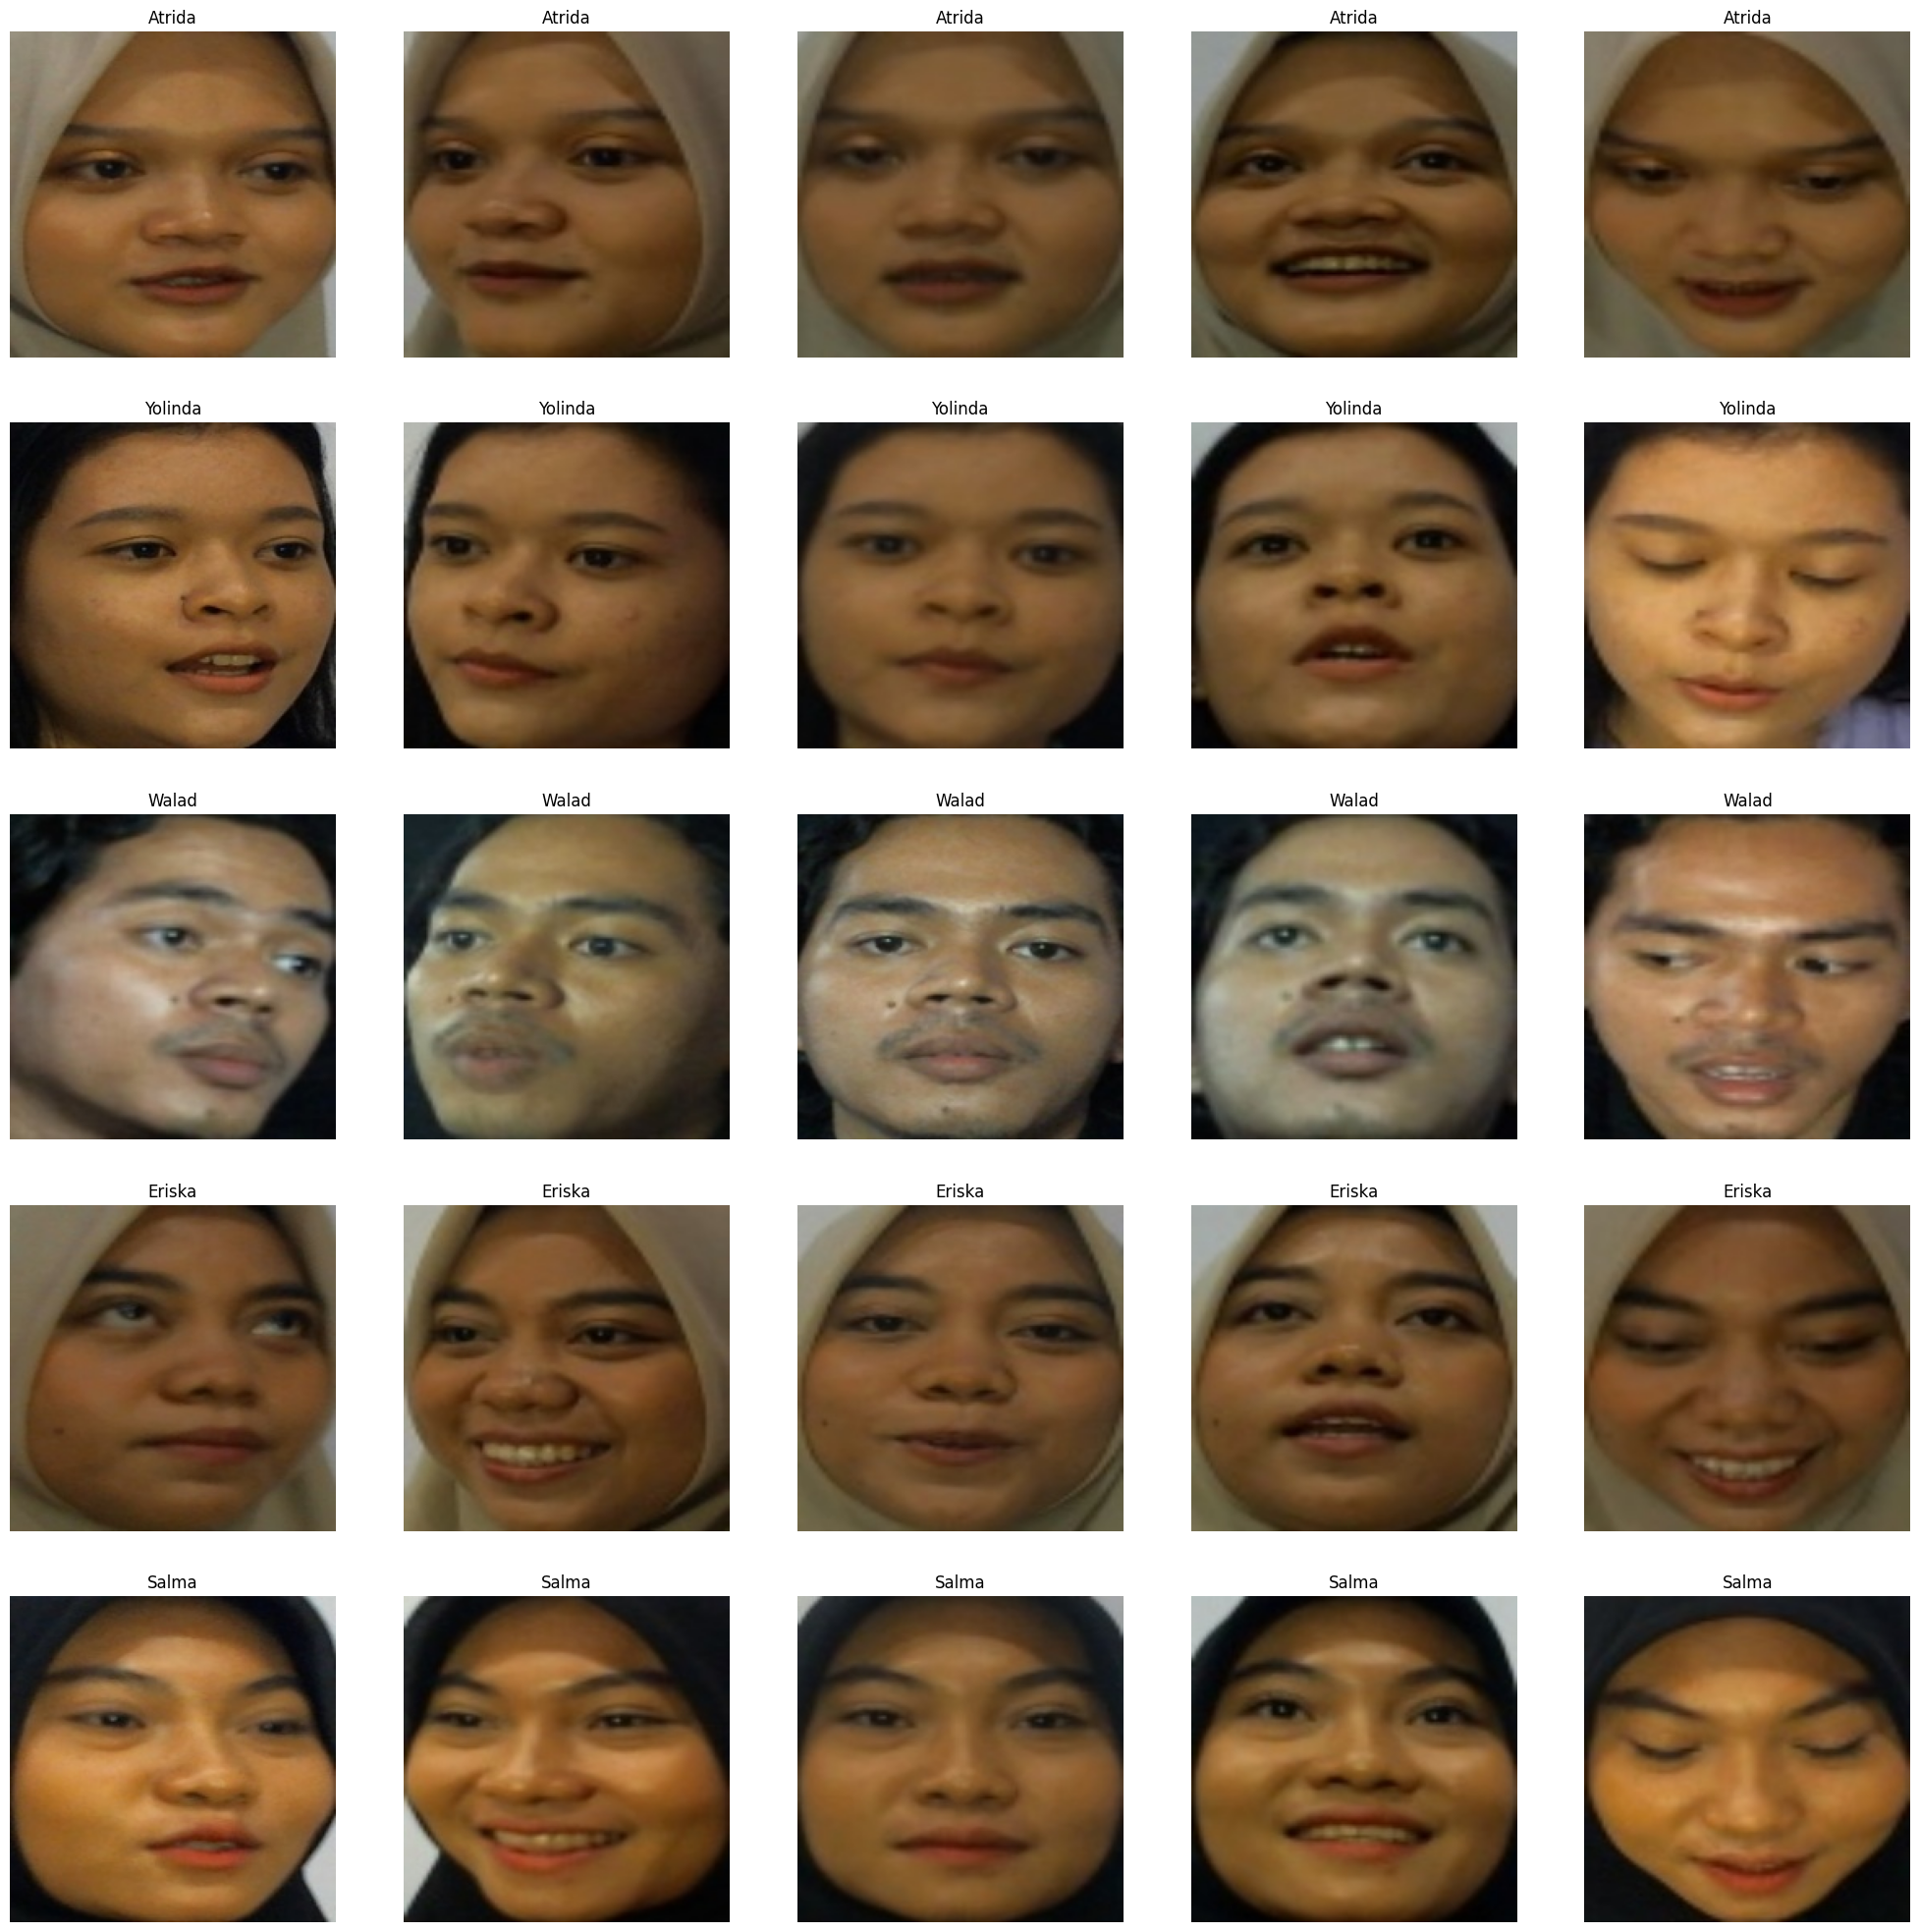

In [12]:
# Path dataset training langsung tanpa 'dataset'
train_dir = 'Dataset/dataset_train_cropped'

# Kategori/kelas di dalam dataset
categories = ['Atrida_210170028', 'Yolinda_210170208', 
            'Walad_210170159', 'Eriska_210170169','Salma_210170193']

# Akan menampilkan gambar dalam konfigurasi 4x4
nrows = 5
ncols = 5

# Siapkan figur matplotlib, dan ukur agar sesuai dengan foto 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

# Menyiapkan list untuk menyimpan path gambar dari masing-masing kategori
image_paths = []

# Loop untuk mengambil beberapa gambar dari setiap kategori
for category in categories:
    category_dir = os.path.join(train_dir, category)
    category_fnames = os.listdir(category_dir)
    
    # Ambil 4 gambar dari setiap kategori untuk ditampilkan
    next_pix = [os.path.join(category_dir, fname) for fname in category_fnames[:5]]
    image_paths.extend(next_pix)

# Batasi jumlah gambar yang ditampilkan maksimal 16 gambar
image_paths = image_paths[:nrows * ncols]

# Menampilkan gambar-gambar tersebut
for i, img_path in enumerate(image_paths):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(os.path.basename(img_path).split('_')[0])  # Menampilkan nama kategori sebagai judul
    plt.axis('Off')  # Sembunyikan sumbu

plt.show()


## Augmentasi Data

In [11]:
def img_augmentation(img):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    
    # Augmentasi rotasi kecil (±10°)
    M_rot_10 = cv2.getRotationMatrix2D(center, 10, 1.0)
    M_rot_neg_10 = cv2.getRotationMatrix2D(center, -10, 1.0)
    
    # Translasi kecil (±5 piksel)
    M_trans_5 = np.float32([[1, 0, 5], [0, 1, 5]])
    M_trans_neg_5 = np.float32([[1, 0, -5], [0, 1, -5]])
    
    # Augmentasi dengan brightness
    imgs = []
    imgs.append(cv2.warpAffine(img, M_rot_10, (w, h), borderValue=(255, 255, 255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_10, (w, h), borderValue=(255, 255, 255)))
    imgs.append(cv2.warpAffine(img, M_trans_5, (w, h), borderValue=(255, 255, 255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_5, (w, h), borderValue=(255, 255, 255)))
    imgs.append(cv2.add(img, 20))  # Brightness increase
    imgs.append(cv2.add(img, -20)) # Brightness decrease
    
    # Augmentasi flip horizontal
    imgs.append(cv2.flip(img, 1))  # Flip horizontal
    
    return imgs


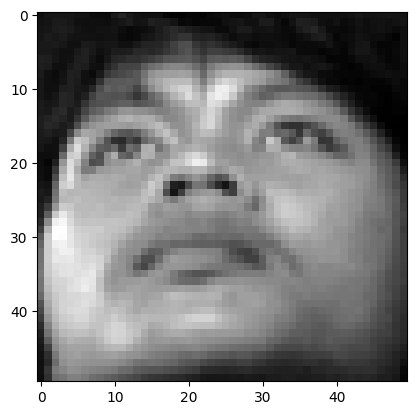

In [12]:
plt.imshow(images[0], cmap="gray")

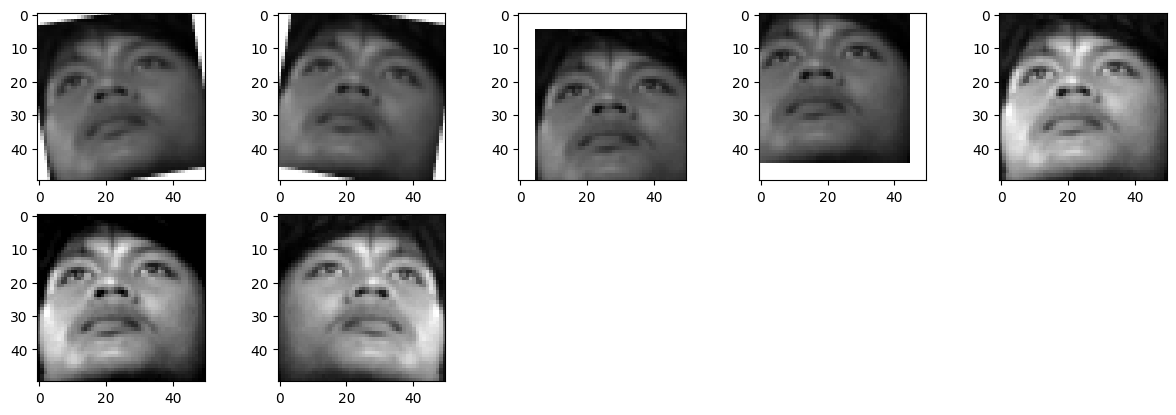

In [13]:
img_test = images[0]

augmented_image_test = img_augmentation(img_test)

plt.figure(figsize=(15,10))
for i, img in enumerate(augmented_image_test[:20]):  # Hanya menampilkan 20 gambar pertama
    plt.subplot(4,5,i+1)
    plt.imshow(img, cmap="gray")
plt.show()

In [14]:
augmented_images = []
augmented_names = []

# Pastikan panjang `images` dan `names` sama
if len(images) != len(names):
    print(f"Length mismatch: images({len(images)}) and names({len(names)})")

for i, img in enumerate(images):
    try:
        # Pastikan indeks `i` valid di `names`
        if i >= len(names):
            print(f"Skipping image {i}: No corresponding name in `names`")
            continue
        
        # Augmentasi gambar dan simpan hasilnya
        aug_imgs = img_augmentation(img)
        
        # Tambahkan hasil augmentasi ke list augmented_images
        augmented_images.extend(aug_imgs)
        
        # Tambahkan label yang sesuai ke augmented_names sebanyak hasil augmentasi
        augmented_names.extend([names[i]] * len(aug_imgs))  # Sesuaikan jumlah label dengan jumlah gambar hasil augmentasi
    except Exception as e:
        print(f"Error processing image {i}: {e}")


In [15]:
len(augmented_images), len(augmented_names)

(189000, 189000)

In [16]:
images.extend(augmented_images)
names.extend(augmented_names)

In [17]:
len(images), len(names)

(216000, 216000)

In [18]:
unique, counts = np.unique(names, return_counts = True)

for item in zip(unique, counts):
    print(item)

('Aldi_210170172', 6000)
('Anisa_220170186', 6000)
('Aqiilah_210170162', 6000)
('Ari_210170114', 6000)
('Atrida_210170028', 6000)
('Caca_210170054', 6000)
('Citra_210170063', 6000)
('Dian_220170068', 6000)
('Dika_210170126', 6000)
('Dilla_210170032', 6000)
('Dini_210170167', 6000)
('Eriska_210170169', 6000)
('Indri_210170058', 6000)
('Irvina_210170182', 6000)
('Lala_210170123', 6000)
('Lidaini_210170223', 6000)
('Luthfy_210170271', 6000)
('Nadya_210170155', 6000)
('Nailis_220170194', 6000)
('Nurul_220170196', 6000)
('Putri_210170281', 6000)
('Rena_220170188', 6000)
('Rifka_210170164', 6000)
('Riska_210170267', 6000)
('Rizka_220170183', 6000)
('Salma_210170193', 6000)
('Silvia_220170116', 6000)
('Sofa_220170170', 6000)
('Syamsul_210170186', 6000)
('Syifa_210170280', 6000)
('Syifa_220170193', 6000)
('Tata_210170241', 6000)
('Ulfa_220170200', 6000)
('Walad_210170159', 6000)
('Wirda_210170033', 6000)
('Yolinda_210170208', 6000)


Validasi

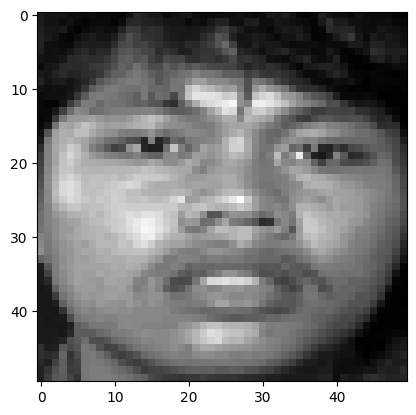

In [19]:
plt.imshow(images_val[0], cmap="gray")

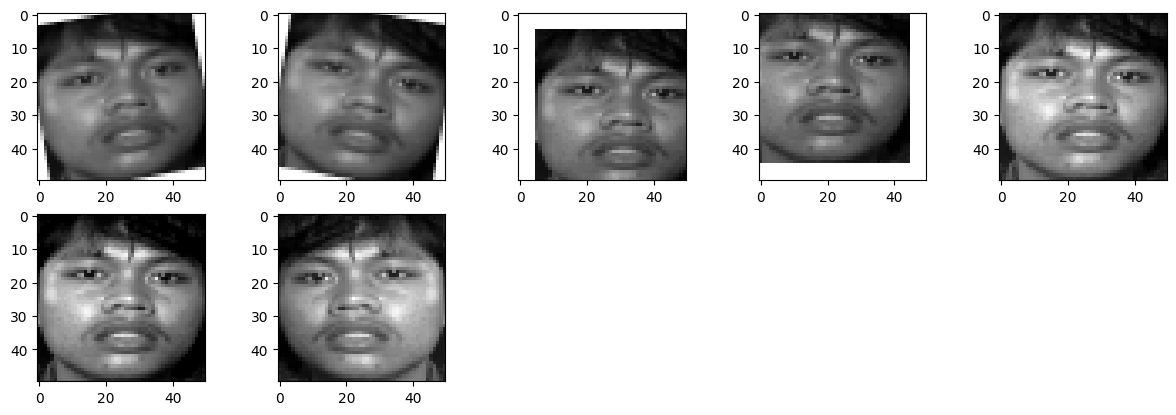

In [20]:
img_test_val = images_val[0]

augmented_image_test_val = img_augmentation(img_test_val)

plt.figure(figsize=(15,10))
for i, img in enumerate(augmented_image_test_val[:20]):  # Hanya menampilkan 20 gambar pertama
    plt.subplot(4,5,i+1)
    plt.imshow(img, cmap="gray")
plt.show()

In [21]:
augmented_images_val = []
augmented_names_val = []

# Pastikan panjang `images` dan `names` sama
if len(images_val) != len(names_val):
    print(f"Length mismatch: images({len(images_val)}) and names({len(names_val)})")

for i, img in enumerate(images_val):
    try:
        # Pastikan indeks `i` valid di `names`
        if i >= len(names_val):
            print(f"Skipping image {i}: No corresponding name in `names`")
            continue
        
        # Augmentasi gambar dan simpan hasilnya
        aug_imgs = img_augmentation(img)
        
        # Tambahkan hasil augmentasi ke list augmented_images
        augmented_images_val.extend(aug_imgs)
        
        # Tambahkan label yang sesuai ke augmented_names sebanyak hasil augmentasi
        augmented_names_val.extend([names_val[i]] * len(aug_imgs))  # Sesuaikan jumlah label dengan jumlah gambar hasil augmentasi
    except Exception as e:
        print(f"Error processing image {i}: {e}")


In [22]:
len(augmented_images_val), len(augmented_names_val)

(21420, 21420)

In [23]:
images_val.extend(augmented_images_val)
names_val.extend(augmented_names_val)

In [24]:
len(images_val), len(names_val)

(24480, 24480)

In [25]:
unique, counts = np.unique(names_val, return_counts = True)

for item in zip(unique, counts):
    print(item)

('Aldi_210170172', 680)
('Anisa_220170186', 680)
('Aqiilah_210170162', 680)
('Ari_210170114', 680)
('Atrida_210170028', 680)
('Caca_210170054', 680)
('Citra_210170063', 680)
('Dian_220170068', 680)
('Dika_210170126', 680)
('Dilla_210170032', 680)
('Dini_210170167', 680)
('Eriska_210170169', 680)
('Indri_210170058', 680)
('Irvina_210170182', 680)
('Lala_210170123', 680)
('Lidaini_210170223', 680)
('Luthfy_210170271', 680)
('Nadya_210170155', 680)
('Nailis_220170194', 680)
('Nurul_220170196', 680)
('Putri_210170281', 680)
('Rena_220170188', 680)
('Rifka_210170164', 680)
('Riska_210170267', 680)
('Rizka_220170183', 680)
('Salma_210170193', 680)
('Silvia_220170116', 680)
('Sofa_220170170', 680)
('Syamsul_210170186', 680)
('Syifa_210170280', 680)
('Syifa_220170193', 680)
('Tata_210170241', 680)
('Ulfa_220170200', 680)
('Walad_210170159', 680)
('Wirda_210170033', 680)
('Yolinda_210170208', 680)


### 1.1.B Balancing Data

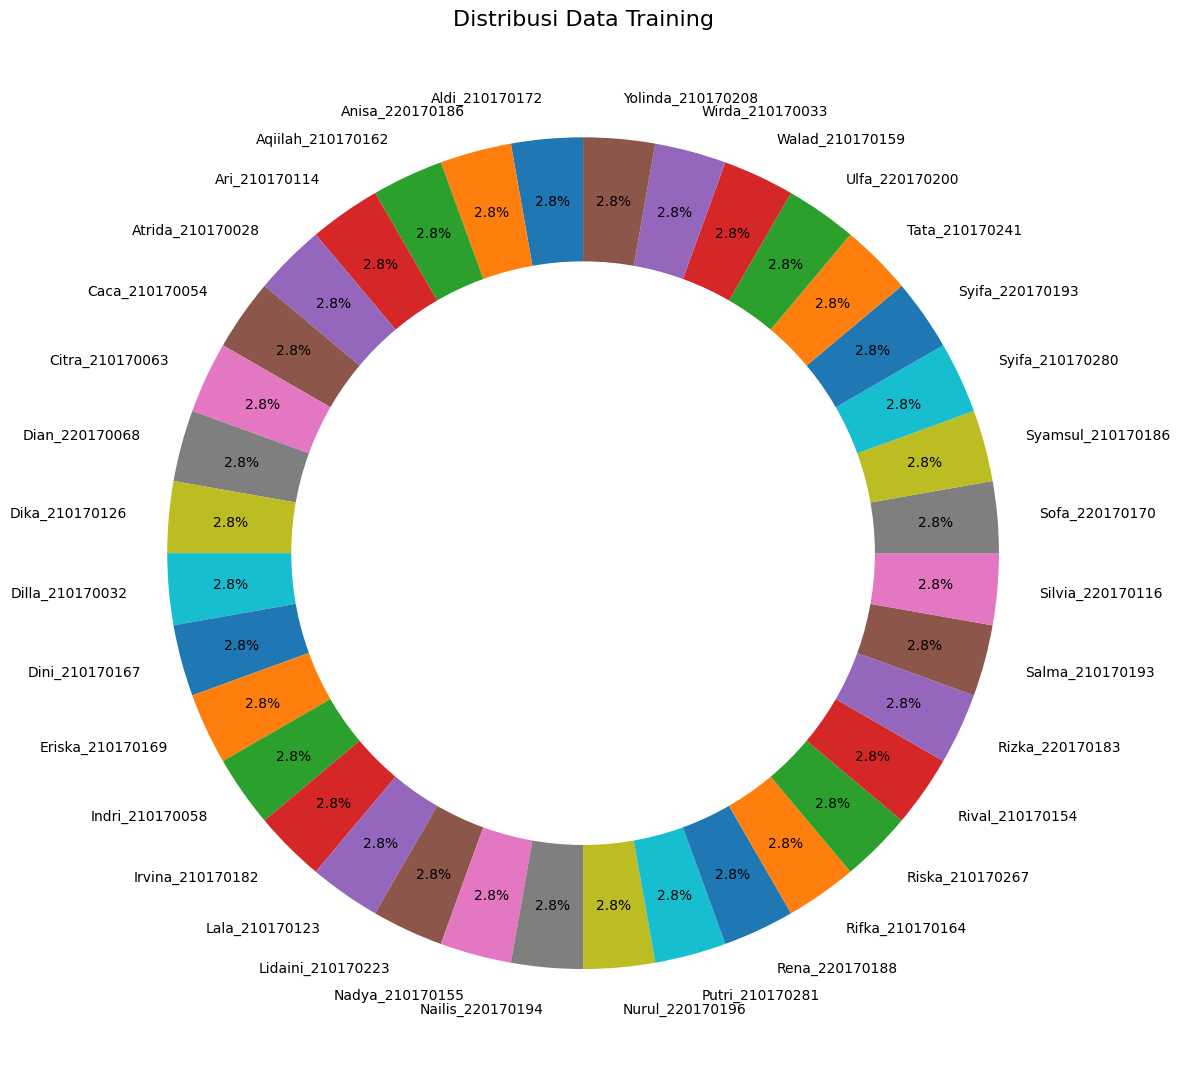

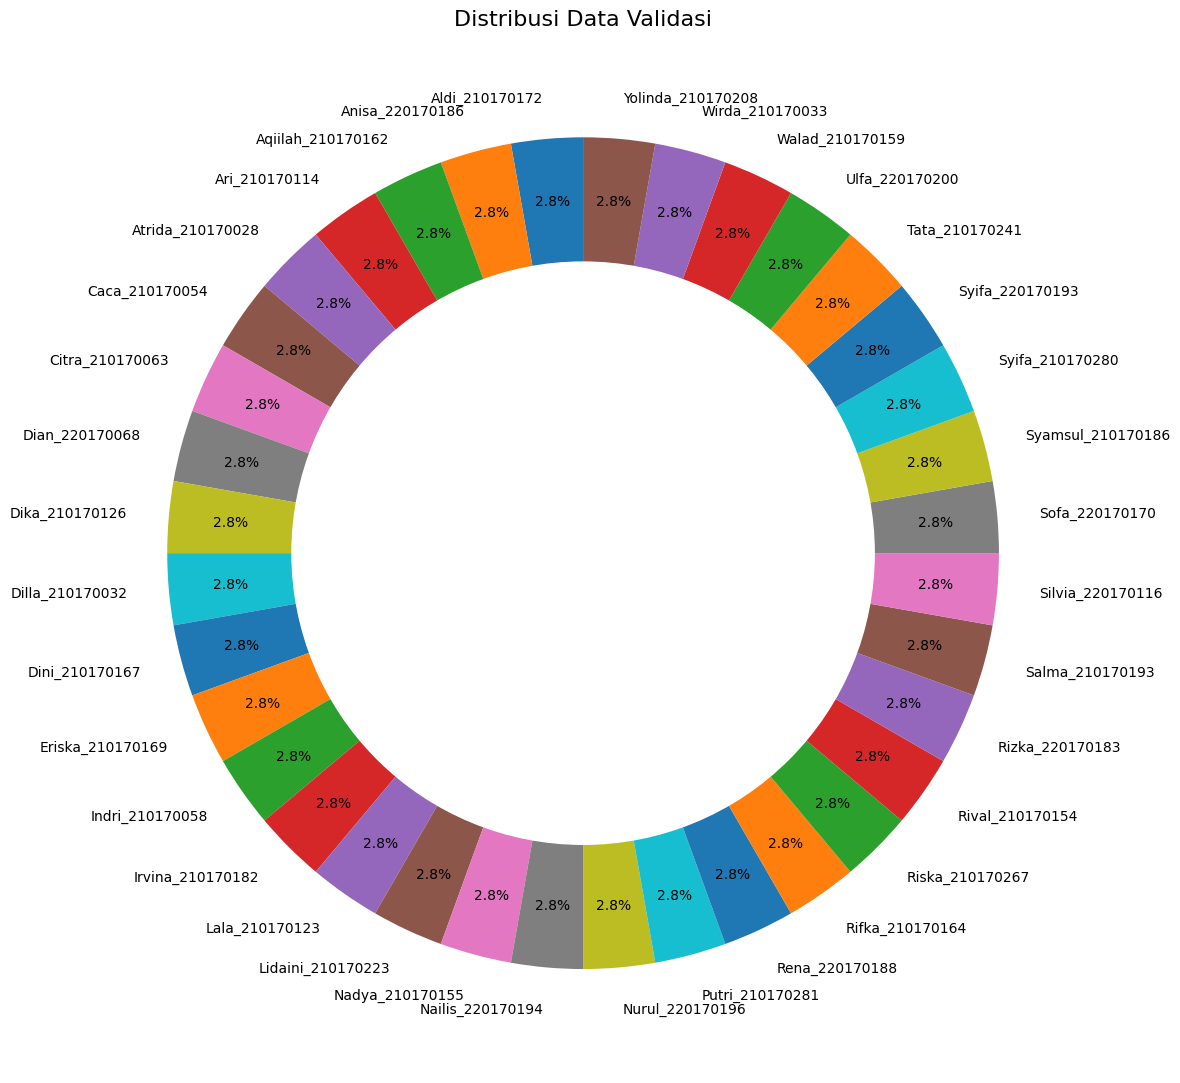

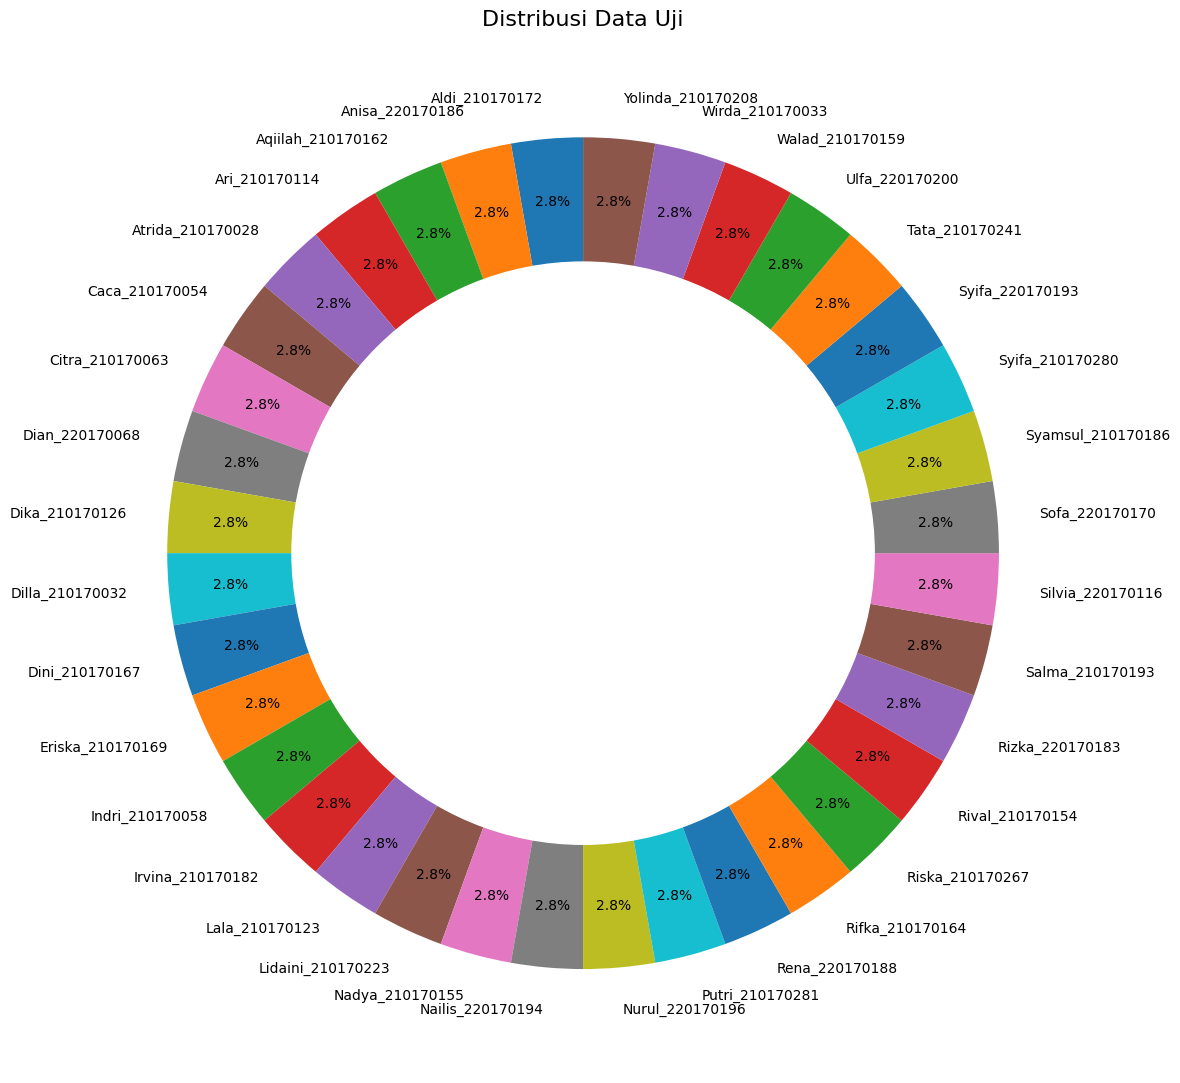

In [15]:
# Fungsi untuk menampilkan pie chart
def print_data(label_distr, label_name, title):
    plt.figure(figsize=(12, 12))  # Atur ukuran plot lebih besar untuk menghindari tumpukan
    wedges, texts, autotexts = plt.pie(
        label_distr,
        labels=label_name,
        autopct='%1.1f%%',
        startangle=90,  # Mulai dari 90 derajat agar lebih merata
        textprops={'fontsize': 10},  # Atur ukuran font lebih kecil
        pctdistance=0.85  # Posisikan persentase lebih dekat ke tengah
    )

    # Membuat lingkaran tengah agar pie chart berbentuk donut
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    plt.gcf().gca().add_artist(my_circle)

    # Atur rotasi label agar lebih jelas
    for text in texts:
        text.set_rotation_mode('anchor')

    plt.title(title, fontsize=16)
    plt.tight_layout()  # Pastikan elemen tidak tertimpa
    plt.show()

# Fungsi untuk menghitung distribusi label dari dataset folder
def get_label_distribution(dataset_dir, categories):
    label_distr = []
    for category in categories:
        category_dir = os.path.join(dataset_dir, category)
        num_images = len(os.listdir(category_dir))  # Hitung jumlah gambar di setiap kategori
        label_distr.append(num_images)
    return label_distr

# Path dataset_train dan dataset_validasi
train_dir = 'Dataset/dataset_train_cropped'
validation_dir = 'Dataset/dataset_validasi_cropped'
uji_dir = 'Dataset/dataset_uji_cropped'

# Daftar kategori/kelas
categories = ['Aldi_210170172', 'Anisa_220170186', 'Aqiilah_210170162', 'Ari_210170114',
 'Atrida_210170028', 'Caca_210170054', 'Citra_210170063',
 'Dian_220170068', 'Dika_210170126', 'Dilla_210170032', 'Dini_210170167',
 'Eriska_210170169', 'Indri_210170058', 'Irvina_210170182',
 'Lala_210170123', 'Lidaini_210170223',  'Nadya_210170155',
 'Nailis_220170194', 'Nurul_220170196', 'Putri_210170281',
 'Rena_220170188', 'Rifka_210170164', 'Riska_210170267', 'Rival_210170154',
 'Rizka_220170183', 'Salma_210170193', 'Silvia_220170116', 'Sofa_220170170',
 'Syamsul_210170186', 'Syifa_210170280', 'Syifa_220170193', 'Tata_210170241',
 'Ulfa_220170200', 'Walad_210170159', 'Wirda_210170033', 'Yolinda_210170208']

# Hitung distribusi label untuk dataset_train
train_label_distr = get_label_distribution(train_dir, categories)
train_label_name = categories

# Hitung distribusi label untuk dataset_validasi
validation_label_distr = get_label_distribution(validation_dir, categories)
validation_label_name = categories

# Hitung distribusi label untuk dataset_uji
uji_label_distr = get_label_distribution(uji_dir, categories)
uji_label_name = categories

# Menampilkan pie chart untuk distribusi data training dan validasi
print_data(train_label_distr, train_label_name, title="Distribusi Data Training")
print_data(validation_label_distr, validation_label_name, title="Distribusi Data Validasi")
print_data(uji_label_distr, uji_label_name, title="Distribusi Data Uji")


### Encoding Label & Categoricalization
Proses mengonversi label kelas ke format numerik (encoding) dan representasi biner (one-hot encoding) agar dapat diproses oleh model CNN.

Dataset_train

In [16]:
le = LabelEncoder()

le.fit(names)

labels_train = le.classes_

name_vec_train = le.transform(names)

categorical_name_vec_train = to_categorical(name_vec_train)

In [17]:
print("number of class :", len(labels_train))
print(labels_train)
print("\n Ubah Labels menjadi Angka : ", name_vec_train)
print("\n Ubah Angka menjadi one-hot encoding yaitu vektor biner : \n", categorical_name_vec_train)

number of class : 36
['Aldi_210170172' 'Anisa_220170186' 'Aqiilah_210170162' 'Ari_210170114'
 'Atrida_210170028' 'Caca_210170054' 'Citra_210170063' 'Dian_220170068'
 'Dika_210170126' 'Dilla_210170032' 'Dini_210170167' 'Eriska_210170169'
 'Indri_210170058' 'Irvina_210170182' 'Lala_210170123' 'Lidaini_210170223'
 'Nadya_210170155' 'Nailis_220170194' 'Nurul_220170196' 'Putri_210170281'
 'Rena_220170188' 'Rifka_210170164' 'Riska_210170267' 'Rival_210170154'
 'Rizka_220170183' 'Salma_210170193' 'Silvia_220170116' 'Sofa_220170170'
 'Syamsul_210170186' 'Syifa_210170280' 'Syifa_220170193' 'Tata_210170241'
 'Ulfa_220170200' 'Walad_210170159' 'Wirda_210170033' 'Yolinda_210170208']

 Ubah Labels menjadi Angka :  [ 0  0  0 ... 35 35 35]

 Ubah Angka menjadi one-hot encoding yaitu vektor biner : 
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


Dataset_Validasi

In [18]:
le = LabelEncoder()

le.fit(names_val)

labels_val = le.classes_

name_vec_val = le.transform(names_val)

categorical_name_vec_val = to_categorical(name_vec_val)

In [19]:
print("number of class :", len(labels_val))
print(labels_val)
print("\n Ubah Labels menjadi Angka : ", name_vec_val)
print("\n Ubah Angka menjadi one-hot encoding yaitu vektor biner : \n", categorical_name_vec_val)

number of class : 36
['Aldi_210170172' 'Anisa_220170186' 'Aqiilah_210170162' 'Ari_210170114'
 'Atrida_210170028' 'Caca_210170054' 'Citra_210170063' 'Dian_220170068'
 'Dika_210170126' 'Dilla_210170032' 'Dini_210170167' 'Eriska_210170169'
 'Indri_210170058' 'Irvina_210170182' 'Lala_210170123' 'Lidaini_210170223'
 'Nadya_210170155' 'Nailis_220170194' 'Nurul_220170196' 'Putri_210170281'
 'Rena_220170188' 'Rifka_210170164' 'Riska_210170267' 'Rival_210170154'
 'Rizka_220170183' 'Salma_210170193' 'Silvia_220170116' 'Sofa_220170170'
 'Syamsul_210170186' 'Syifa_210170280' 'Syifa_220170193' 'Tata_210170241'
 'Ulfa_220170200' 'Walad_210170159' 'Wirda_210170033' 'Yolinda_210170208']

 Ubah Labels menjadi Angka :  [ 0  0  0 ... 35 35 35]

 Ubah Angka menjadi one-hot encoding yaitu vektor biner : 
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


Dataset Uji

In [20]:
le = LabelEncoder()

le.fit(names_uji)

labels_uji = le.classes_

name_vec_uji = le.transform(names_uji)

categorical_name_vec_uji = to_categorical(name_vec_uji)

In [21]:
print("number of class :", len(labels_uji))
print(labels_val)
print("\n Ubah Labels menjadi Angka : ", name_vec_uji)
print("\n Ubah Angka menjadi one-hot encoding yaitu vektor biner : \n", categorical_name_vec_uji)

number of class : 36
['Aldi_210170172' 'Anisa_220170186' 'Aqiilah_210170162' 'Ari_210170114'
 'Atrida_210170028' 'Caca_210170054' 'Citra_210170063' 'Dian_220170068'
 'Dika_210170126' 'Dilla_210170032' 'Dini_210170167' 'Eriska_210170169'
 'Indri_210170058' 'Irvina_210170182' 'Lala_210170123' 'Lidaini_210170223'
 'Nadya_210170155' 'Nailis_220170194' 'Nurul_220170196' 'Putri_210170281'
 'Rena_220170188' 'Rifka_210170164' 'Riska_210170267' 'Rival_210170154'
 'Rizka_220170183' 'Salma_210170193' 'Silvia_220170116' 'Sofa_220170170'
 'Syamsul_210170186' 'Syifa_210170280' 'Syifa_220170193' 'Tata_210170241'
 'Ulfa_220170200' 'Walad_210170159' 'Wirda_210170033' 'Yolinda_210170208']

 Ubah Labels menjadi Angka :  [ 0  0  0 ... 35 35 35]

 Ubah Angka menjadi one-hot encoding yaitu vektor biner : 
 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


#### Tahap konversi data ke dalam format array numerik

In [22]:
# Mendapatkan variabel x_train x_val dan y_test
x_train = np.array(images, dtype=np.float32)
x_val = np.array(images_val, dtype=np.float32)
x_test = np.array(images_uji, dtype=np.float32)

# Mendapatkan variabel y_train y_val dan y_test
y_train = categorical_name_vec_train
y_val = categorical_name_vec_val
y_test = categorical_name_vec_uji

In [24]:
print(x_train.shape, y_val.shape, x_val.shape, y_train.shape)

(27000, 50, 50) (3060, 36) (3060, 50, 50) (27000, 36)


### Reshape Data (Penyesuaian dimensi data gambar)

In [25]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)

In [26]:
x_train.shape, x_val.shape

((27000, 50, 50, 1), (3060, 50, 50, 1))

## Create CNN Model

Pembuatan Model untuk Pelatihan Model

In [33]:
def cnn_model(input_shape):  
    model = Sequential()
    
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape=input_shape))
    
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(Conv2D(128,
                    (3,3),
                    padding="valid",
                    activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(len(labels_train)))  # equal to number of classes
    model.add(Activation("softmax"))
    
    model.summary() 
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])

    return model

## Training CNN Model

In [34]:
input_shape = x_train[0].shape

EPOCHS = 15
BATCH_SIZE = 32

model = cnn_model(input_shape)

history = model.fit(x_train, 
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    shuffle=True,
                    validation_data=(x_val, y_val) 
                    )

c:\Users\Chris\.conda\envs\tutorial_notebook\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 19, 19, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         2,340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 36)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,596,836 (6.09 MB)

 Trainable params: 1,596,836 (6.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 2048s 303ms/step - accuracy: 0.8008 - loss: 0.7471 - val_accuracy: 0.9763 - val_loss: 0.0932
Epoch 2/15
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 2038s 302ms/step - accuracy: 0.9867 - loss: 0.0447 - val_accuracy: 0.9842 - val_loss: 0.0770
Epoch 3/15
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 2046s 303ms/step - accuracy: 0.9917 - loss: 0.0293 - val_accuracy: 0.9790 - val_loss: 0.0964
Epoch 4/15
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 2074s 307ms/step - accuracy: 0.9941 - loss: 0.0206 - val_accuracy: 0.9881 - val_loss: 0.0605
Epoch 5/15
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 2043s 303ms/step - accuracy: 0.9952 - loss: 0.0172 - val_accuracy: 0.9905 - val_loss: 0.0582
Epoch 6/15
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 2041s 302ms/step - accuracy: 0.9963 - loss: 0.0152 - val_accuracy: 0.9871 - val_loss: 0.0781
Epoch 7/15
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 2052s 304ms/step - accuracy: 0.9961 - loss: 0.0169 - val_accuracy: 0.9921 - val_loss: 0.0659
Epoch 8/15
6750/6750 ━━━━━━━━━━━━━━━━━━━━ 2050s 304ms/s

Plot history accuracy , precision dan recall untuk training set dan validation set 

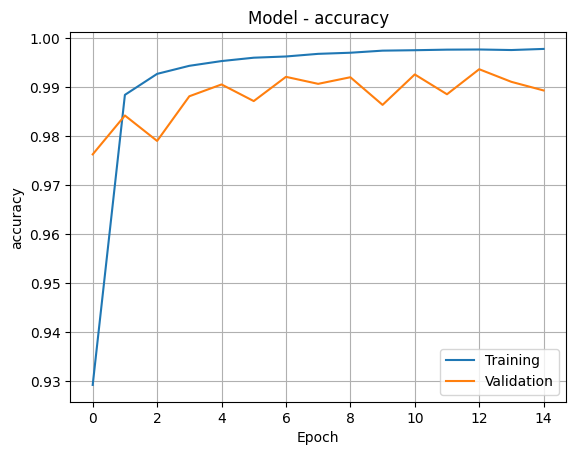

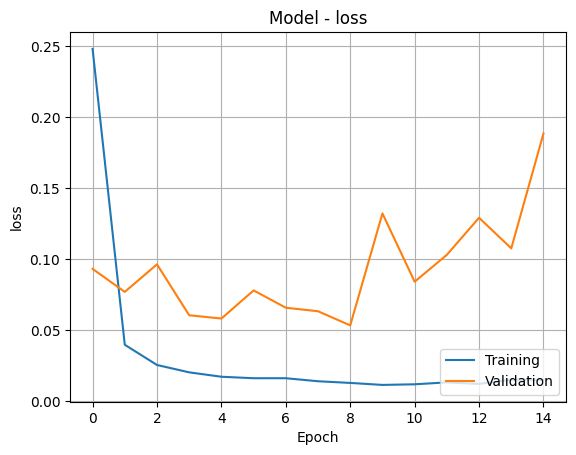

In [35]:
def evaluate_model_(history):
    names = [['accuracy', 'val_accuracy'], 
             ['loss', 'val_loss']]
    for name in names :
        fig1, ax_acc = plt.subplots()
        plt.plot(history.history[name[0]])
        plt.plot(history.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title('Model - ' + name[0])
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()
        
evaluate_model_(history)

- pada plot accuracy untuk validation data terlihat lebih **fluktuatif**, apakah ini normal?
- ini bisa diakibatkan oleh `BATCH_SIZE` yang **terlalu kecil**, seperti contohnya jika pada dataset terdapat misslabeled data yang mengakibatkan nilai loss meningkat atau menjauhkannya dari local minima.
- efek ini bisa dihindari jika kita memilih `BATCH_SIZE` lebih besar. 
- Namun `BATCH_SIZE` yang **terlalu besar** dapat mengakibatkan **training** process menjadi lebih berat dan **lambat**.
- selain itu `BATCH_SIZE` **terlalu besar** akan mengakibatkan **generalization** pada model menjadi **jelek** (sumber [link](https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e#:~:text=large%20batch%20size%20means%20the,all%20about%20the%20same%20size.))
- **Generalization** merupakan salah satu kemampuan Neural Network yang artinya model mampu mengklasifikasikan data yang tidak pernah dilihat sebelumnya (*unseen data*) (sumber [link](http://www.eie.polyu.edu.hk/~enzheru/snns/SNNSinfo/UserManual/node16.html#:~:text=Learning%20in%20Neural-,Generalization%20of%20Neural%20Networks,it%20has%20never%20seen%20before.))

- save model

In [36]:
model.save("model-facereconetion-cnn(50x50)36kelas.h5")

In [37]:
# predict test data
y_pred=model.predict(x_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step


- plot confusion matrix

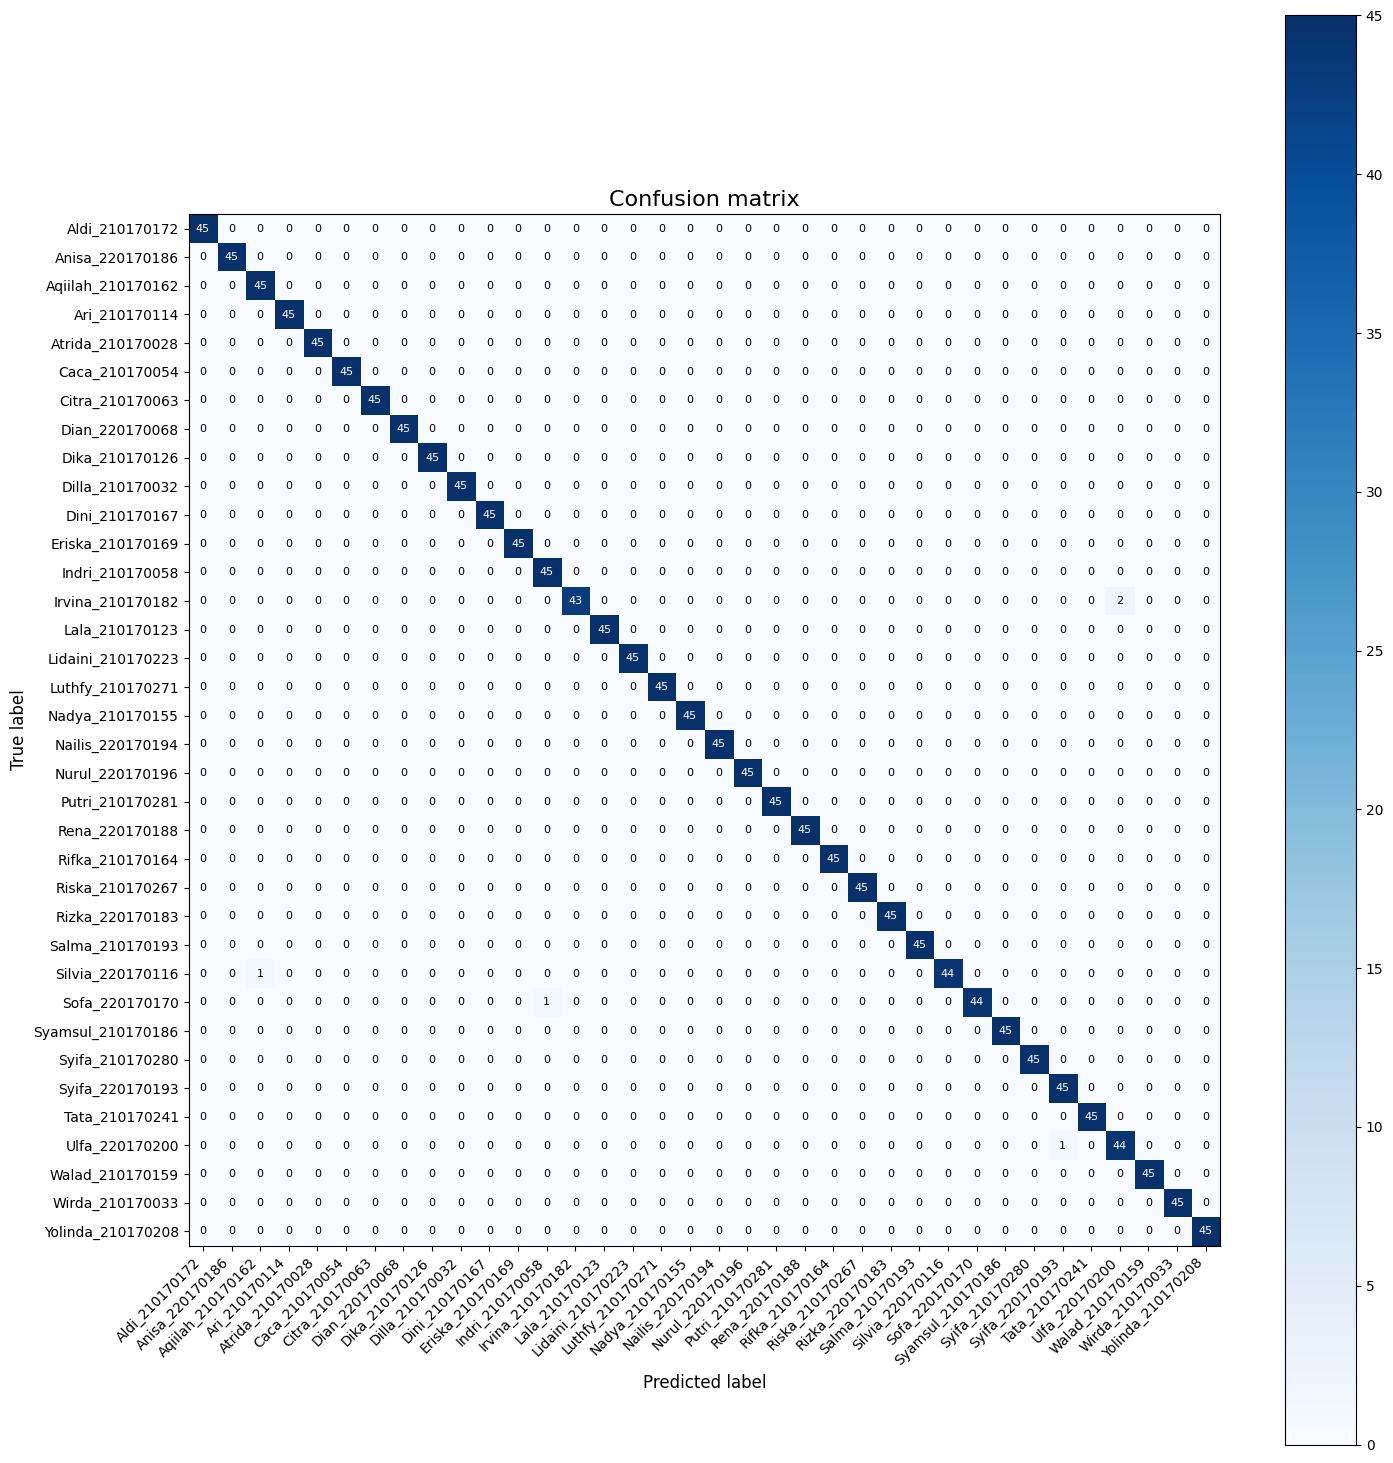

In [38]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Function to plot the confusion matrix.
    Args:
        cm: Confusion matrix values.
        classes: List of class labels.
        normalize: If True, normalize the values in the confusion matrix.
        title: Title of the confusion matrix plot.
        cmap: Color map for the plot.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(15, 15))  # Ukuran figure lebih besar untuk menampung semua elemen
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)  # Ukuran font untuk judul
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10, ha='right')  # Rotasi label X dan font
    plt.yticks(tick_marks, classes, fontsize=10)  # Font size untuk label Y

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 fontsize=8,  # Ukuran font nilai pada kotak
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout(pad=2.0)  # Beri ruang tambahan untuk elemen agar tidak bertabrakan
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.show()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix tanpa perlu mendefinisikan ulang labels_uji
plot_confusion_matrix(cnf_matrix, classes=labels_uji, normalize=False, title='Confusion matrix')


- Calculate metric report menggunakan `classification_report()` pada `scikit-learn` 

In [39]:
print(classification_report(y_test.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=labels_uji))

                   precision    recall  f1-score   support

   Aldi_210170172       1.00      1.00      1.00        45
  Anisa_220170186       1.00      1.00      1.00        45
Aqiilah_210170162       0.98      1.00      0.99        45
    Ari_210170114       1.00      1.00      1.00        45
 Atrida_210170028       1.00      1.00      1.00        45
   Caca_210170054       1.00      1.00      1.00        45
  Citra_210170063       1.00      1.00      1.00        45
   Dian_220170068       1.00      1.00      1.00        45
   Dika_210170126       1.00      1.00      1.00        45
  Dilla_210170032       1.00      1.00      1.00        45
   Dini_210170167       1.00      1.00      1.00        45
 Eriska_210170169       1.00      1.00      1.00        45
  Indri_210170058       0.98      1.00      0.99        45
 Irvina_210170182       1.00      0.96      0.98        45
   Lala_210170123       1.00      1.00      1.00        45
Lidaini_210170223       1.00      1.00      1.00       

___
### Pengujian Dengan Kamera Langsung dan Berdasarkan Vidio

Fungsi untuk membuat frame

In [ ]:
def draw_ped(img, label, x0, y0, xt, yt, color=None, color_known=(0, 255, 0), color_unknown=(0, 0, 255), text_color=(255, 255, 255)):
    # Menentukan warna frame berdasarkan label atau parameter color jika disediakan
    if color is None:
        if "unknown" in label.lower():
            color = color_unknown  # Warna merah untuk label 'unknown'
        else:
            color = color_known  # Warna hijau untuk label yang dikenali
    
    # Menghitung ukuran teks label
    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    
    # Menggambar frame wajah dengan ukuran sesuai koordinat wajah
    cv2.rectangle(img, (x0, y0), (xt, yt), color, 2)
    
    # Menghitung posisi label di atas frame wajah dengan rata tengah
    label_x = x0 + (xt - x0 - w) // 2  # Memposisikan label di tengah atas frame wajah
    label_y = y0 - h - baseline if y0 - h - baseline > 0 else y0 + h + baseline  # Menempatkan di atas atau bawah jika tidak muat
    
    # Menggambar latar belakang untuk label di atas frame wajah
    cv2.rectangle(img, (label_x, label_y), (label_x + w, label_y + h + baseline), color, -1)
    
    # Menempatkan teks di dalam latar label
    cv2.putText(img, label, (label_x, label_y + h), cv2.FONT_HERSHEY_SIMPLEX, 0.5, text_color, 1, cv2.LINE_AA)
    
    return img


Pengujian Kamera Langsung

In [31]:
# --------- Load YOLOv8-face model -------------
from ultralytics import YOLO
from tensorflow.keras.models import load_model
import cv2
import numpy as np

yolo_model = YOLO("yolov8n-face.pt")
print("[INFO] YOLOv8 model loaded successfully...")

# --------- Load Keras CNN model -------------
model = load_model("model-facereconetion-cnn(50x50)36kelas.h5")
print("[INFO] Finish loading CNN model...")


# --------- Open the camera -------------
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:  # Check if frame is captured successfully
        # Deteksi wajah menggunakan YOLOv8-face
        results = yolo_model(frame, stream=True)  # Streaming untuk deteksi realtime
        for result in results:
            boxes = result.boxes.xyxy.cpu().numpy()  # Bounding box koordinat
            scores = result.boxes.conf.cpu().numpy()  # Confidence score
            
            for (box, score) in zip(boxes, scores):
                if score > 0.5:  # Threshold YOLO confidence
                    x1, y1, x2, y2 = map(int, box)
                    
                    # Crop wajah berdasarkan bounding box YOLO
                    face_img = frame[y1:y2, x1:x2]
                    
                    # Pastikan hasil cropping valid sebelum memproses
                    if face_img.size > 0:
                        # Preprocessing untuk CNN
                        face_img = cv2.resize(face_img, (50, 50))
                        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
                        face_img = face_img.reshape(1, 50, 50, 1)
                        
                        # Prediksi menggunakan model CNN
                        result = model.predict(face_img, verbose=0)
                        idx = result.argmax(axis=1)
                        confidence = result.max(axis=1) * 100
                        
                        # Tentukan label berdasarkan confidence threshold
                        confidence_threshold = 80.0
                        if confidence[0] > confidence_threshold:
                            label_text = "%s (%.2f%%)" % (labels_uji[idx[0]], confidence[0])
                        else:
                            label_text = "Unknown"
                        
                        print(label_text)

                        # Gunakan draw_ped untuk menggambar di frame
                        frame = draw_ped(frame, label_text, x1, y1, x2, y2)

        # Tampilkan frame dengan bounding box dan label
        cv2.imshow('Pengenalan Wajah', frame)
    else:
        print("Failed to grab frame.")
        break

    # Keluar dari loop jika tombol 'q' ditekan
    if cv2.waitKey(10) == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


[INFO] YOLOv8 model loaded successfully...


[INFO] Finish loading CNN model...

0: 480x640 1 face, 289.9ms
Dini_210170167 (100.00%)
Speed: 45.3ms preprocess, 289.9ms inference, 25.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 506.7ms
Syamsul_210170186 (81.47%)
Speed: 72.5ms preprocess, 506.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 216.4ms
Dilla_210170032 (93.29%)
Speed: 15.5ms preprocess, 216.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 338.6ms
Speed: 17.3ms preprocess, 338.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 200.4ms
Speed: 6.2ms preprocess, 200.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 face, 160.6ms
Ari_210170114 (99.92%)
Speed: 13.1ms preprocess, 160.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 184.4ms
Speed: 4.4ms preprocess, 184.4ms inference, 0.8ms postpro

Pake Yolo Untuk Deteksi Object Wajah

In [ ]:
#Pengujian Vidio 1
import time
import cv2
import numpy as np
from ultralytics import YOLO
from keras.models import load_model

# --------- load YOLOv8 model for face detection -------------
yolo_model = YOLO('yolov8n-face.pt')

# --------- load Keras CNN model -------------
model = load_model("model-facereconetion-cnn(50x50)36kelas.h5")
print("[INFO] finish load CNN model...")

# --------- Open the video file -------------
cap = cv2.VideoCapture('Bahan_Pengujian/Video1.mp4')

# Get the width, height, and frames per second (fps) of the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_delay = 1 / fps  # delay per frame in seconds

# Set up the video writer to save output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('Hasil_Pengujian/Hasil_Vidio(1)_50x50_36kelas.mp4', fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    start_time = time.time()  # Capture start time of the frame

    ret, frame = cap.read()
    if not ret:  # If frame not captured successfully, break the loop
        print("Failed to grab frame or end of video.")
        break

    # Use YOLO model to detect faces
    results = yolo_model(frame, conf=0.5)  # Confidence threshold at 50%
    faces = results[0].boxes.xyxy  # Extract bounding boxes

    for box in faces:
        x1, y1, x2, y2 = map(int, box[:4])
        face_img = frame[y1:y2, x1:x2]

        # Preprocess face image for CNN model
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
        face_img = cv2.resize(face_img, (50, 50))
        face_img = face_img.reshape(1, 50, 50, 1)

        # Predict using CNN model
        result = model.predict(face_img)
        idx = result.argmax(axis=1)
        confidence = result.max(axis=1) * 100

        confidence_threshold = 80.0  # Adjust this threshold based on your test results

        if confidence[0] > confidence_threshold:  # If confidence > 80%, we trust the prediction
            label_text = "%s (%.2f%%)" % (labels_uji[idx[0]], confidence[0])
        else:
            label_text = "Unknown"  # If confidence is too low, we mark it as 'N/A'

        print(label_text)  # Displaying the label and confidence

        # Draw bounding box and label using draw_ped
        frame = draw_ped(
            img=frame,
            label=label_text,
            x0=x1,
            y0=y1,
            xt=x2,
            yt=y2,
        )

 # Resize frame to a smaller size, e.g., 50% of its original dimensions
    resized_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # Display the resized frame
    cv2.imshow('Pengenalan Wajah', resized_frame)
    out.write(frame)  # Save the original-sized processed frame to the output video

    # Calculate remaining time to maintain fps, then delay
    elapsed_time = time.time() - start_time
    time_to_wait = frame_delay - elapsed_time if frame_delay > elapsed_time else 0
    if time_to_wait > 0:
        time.sleep(time_to_wait)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(10) == ord('q'):
        break

# Release the resources
cap.release()
out.release()
cv2.destroyAllWindows()


[INFO] finish load CNN model...

0: 640x384 2 faces, 317.0ms
Speed: 19.6ms preprocess, 317.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Caca_210170054 (99.98%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Rizka_220170183 (87.36%)

0: 640x384 2 faces, 121.0ms
Speed: 6.6ms preprocess, 121.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Unknown
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Rizka_220170183 (97.86%)

0: 640x384 2 faces, 141.5ms
Speed: 6.6ms preprocess, 141.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Unknown
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Rizka_220170183 (94.02%)

0: 640x384 3 faces, 123.1ms
Speed: 1.2ms preprocess, 123.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Salma_210170193 (95.96%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Rizka_22017018

Pengujian Pada Vidio 2

In [ ]:
#Pengujian Vidio 2
import time
import cv2
import numpy as np
from ultralytics import YOLO
from keras.models import load_model

# --------- load YOLOv8 model for face detection -------------
yolo_model = YOLO('yolov8n-face.pt')

# --------- load Keras CNN model -------------
model = load_model("model-facereconetion-cnn(50x50)36kelas.h5")
print("[INFO] finish load CNN model...")

# --------- Open the video file -------------
cap = cv2.VideoCapture('Bahan_Pengujian/Vidio2.MOV')

# Get the width, height, and frames per second (fps) of the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_delay = 1 / fps  # delay per frame in seconds

# Set up the video writer to save output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('Hasil_Pengujian/Hasil_Vidio(2)_50x50_36kelas.mp4', fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    start_time = time.time()  # Capture start time of the frame

    ret, frame = cap.read()
    if not ret:  # If frame not captured successfully, break the loop
        print("Failed to grab frame or end of video.")
        break

    # Use YOLO model to detect faces
    results = yolo_model(frame, conf=0.5)  # Confidence threshold at 50%
    faces = results[0].boxes.xyxy  # Extract bounding boxes

    for box in faces:
        x1, y1, x2, y2 = map(int, box[:4])
        face_img = frame[y1:y2, x1:x2]

        # Preprocess face image for CNN model
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
        face_img = cv2.resize(face_img, (50, 50))
        face_img = face_img.reshape(1, 50, 50, 1)

        # Predict using CNN model
        result = model.predict(face_img)
        idx = result.argmax(axis=1)
        confidence = result.max(axis=1) * 100

        confidence_threshold = 80.0  # Adjust this threshold based on your test results

        if confidence[0] > confidence_threshold:  # If confidence > 80%, we trust the prediction
            label_text = "%s (%.2f%%)" % (labels_uji[idx[0]], confidence[0])
        else:
            label_text = "Unknown"  # If confidence is too low, we mark it as 'N/A'

        print(label_text)  # Displaying the label and confidence

        # Draw bounding box and label using draw_ped
        frame = draw_ped(
            img=frame,
            label=label_text,
            x0=x1,
            y0=y1,
            xt=x2,
            yt=y2,
        )

 # Resize frame to a smaller size, e.g., 50% of its original dimensions
    resized_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # Display the resized frame
    cv2.imshow('Pengenalan Wajah', resized_frame)
    out.write(frame)  # Save the original-sized processed frame to the output video

    # Calculate remaining time to maintain fps, then delay
    elapsed_time = time.time() - start_time
    time_to_wait = frame_delay - elapsed_time if frame_delay > elapsed_time else 0
    if time_to_wait > 0:
        time.sleep(time_to_wait)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(10) == ord('q'):
        break

# Release the resources
cap.release()
out.release()
cv2.destroyAllWindows()


[INFO] finish load CNN model...

0: 384x640 (no detections), 259.2ms
Speed: 14.2ms preprocess, 259.2ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 636.1ms
Speed: 107.7ms preprocess, 636.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 294.7ms
Speed: 9.0ms preprocess, 294.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 211.7ms
Speed: 8.2ms preprocess, 211.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 168.0ms
Speed: 15.4ms preprocess, 168.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 186.7ms
Speed: 12.5ms preprocess, 186.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 184.5ms
Speed: 11.2ms preprocess, 184.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no 

Pengujian Model Pada Vidio 3 Berdasarkan Jarak

In [ ]:
import time
import cv2
import numpy as np
from ultralytics import YOLO
from keras.models import load_model

# --------- load YOLOv8 model for face detection -------------
yolo_model = YOLO('yolov8n-face.pt')

# --------- load Keras CNN model -------------
model = load_model("model-facereconetion-cnn(50x50)36kelas.h5")
print("[INFO] finish load CNN model...")

# --------- Open the video file -------------
cap = cv2.VideoCapture('Bahan_Pengujian/Vidio3_Berdasarkan_Jarak.mp4')

# Get the width, height, and frames per second (fps) of the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_delay = 1 / fps  # delay per frame in seconds

# Set up the video writer to save output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('Hasil_Pengujian/Hasil_Vidio(3)_50x50_36kelas.mp4', fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    start_time = time.time()  # Capture start time of the frame

    ret, frame = cap.read()
    if not ret:  # If frame not captured successfully, break the loop
        print("Failed to grab frame or end of video.")
        break

    # Use YOLO model to detect faces
    results = yolo_model(frame, conf=0.5)  # Confidence threshold at 50%
    faces = results[0].boxes.xyxy  # Extract bounding boxes

    for box in faces:
        x1, y1, x2, y2 = map(int, box[:4])
        face_img = frame[y1:y2, x1:x2]

        # Preprocess face image for CNN model
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY)
        face_img = cv2.resize(face_img, (50, 50))
        face_img = face_img.reshape(1, 50, 50, 1)

        # Predict using CNN model
        result = model.predict(face_img)
        idx = result.argmax(axis=1)
        confidence = result.max(axis=1) * 100

        confidence_threshold = 80.0  # Adjust this threshold based on your test results

        if confidence[0] > confidence_threshold:  # If confidence > 80%, we trust the prediction
            label_text = "%s (%.2f%%)" % (labels_uji[idx[0]], confidence[0])
        else:
            label_text = "Unknown"  # If confidence is too low, we mark it as 'N/A'

        print(label_text)  # Displaying the label and confidence

        # Draw bounding box and label using draw_ped
        frame = draw_ped(
            img=frame,
            label=label_text,
            x0=x1,
            y0=y1,
            xt=x2,
            yt=y2,
        )

 # Resize frame to a smaller size, e.g., 50% of its original dimensions
    resized_frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)

    # Display the resized frame
    cv2.imshow('Pengenalan Wajah', resized_frame)
    out.write(frame)  # Save the original-sized processed frame to the output video

    # Calculate remaining time to maintain fps, then delay
    elapsed_time = time.time() - start_time
    time_to_wait = frame_delay - elapsed_time if frame_delay > elapsed_time else 0
    if time_to_wait > 0:
        time.sleep(time_to_wait)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(10) == ord('q'):
        break

# Release the resources
cap.release()
out.release()
cv2.destroyAllWindows()


[INFO] finish load CNN model...

0: 640x384 (no detections), 271.6ms
Speed: 22.2ms preprocess, 271.6ms inference, 11.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 217.5ms
Speed: 8.6ms preprocess, 217.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 242.6ms
Speed: 13.0ms preprocess, 242.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 145.4ms
Speed: 38.0ms preprocess, 145.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 194.0ms
Speed: 12.0ms preprocess, 194.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 131.3ms
Speed: 7.9ms preprocess, 131.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 160.8ms
Speed: 8.8ms preprocess, 160.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no de

In [7]:
cv2.destroyAllWindows()
cap.release()